### NBA Data Analysis


<u> By Shon Shchori </u>


---

#### Section 1 - Data wrangling:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse

nba_df = pd.read_csv('nba.csv')

**Now, we will drop the rows that have missing values.**  
Using `inplace` will make sure that the function will save the variable without the rows that have missing values.  
Also, we will reset the index.

In [2]:
nba_df.dropna(inplace = True)
nba_df.reset_index(drop = True, inplace = True)
nba_df[['Age', 'Height', 'Weight', 'Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0


---

#### Section 2 - handeling 'Height' column:
The type of 'Height' column is string. We will do some actions on this column for more convenient handling.  
First, we will define an function called `feet_to_inch` which will convert the height from feet to inches (to keep it in scale).

In [3]:
def feet_to_inch(height):
    height = height.split(".")
    height = float(height[0])*12 + float(height[1])
    return height

Now, we will use `apply` and `lambda` functions to make the convertion shorter and easeir.  
The first lambda function runs over each cell in 'Height' column and replacing the hyphen notes with dots.  
After that, we will use the apply function and the function that we defined to convert the height.

In [4]:
nba_df['Height'] = nba_df['Height'].apply(lambda x: x.replace('-', '.')) #replacing '-' with '.'
nba_df['Height'] = nba_df['Height'].apply(feet_to_inch)
nba_df['Height'] = nba_df['Height'].astype(float) #convering each cell from string to float.
nba_df[['Age', 'Height', 'Weight', 'Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,74.0,180.0,7730337.0
1,25.0,78.0,235.0,6796117.0
2,22.0,77.0,185.0,1148640.0


---

#### Section 3 - Positions visualization:
Here's countplot and pieplot for the 'Position' column.

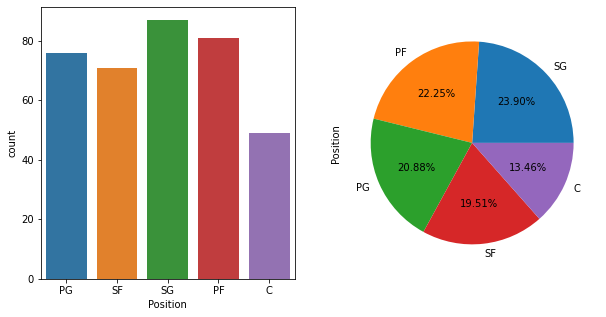

In [5]:
fig, axes = plt.subplots(figsize=(10, 5), ncols = 2)
pos_plot = sns.countplot(ax = axes[0], x='Position', data = nba_df)
pos_pie = nba_df.Position.value_counts().plot.pie(ax = axes[1],autopct="%1.2f%%")

In my opinion, **countplot** is easier to read because the height of each column and the left bar that helps to indicate the approximate value. this way it is easy to evaluate the amount and the order of the positions.

---

<a id='section4'></a>
### Section 4 - Predict salaries:
define the model.

In [6]:
x = nba_df[['Age', 'Height', 'Weight']] #The features which will predict the target.
y = nba_df['Salary'] #The target is the Salary of the player.

In [7]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=1) 

The first five rows of the data that will use to train the model (x_train - features):

In [8]:
x_train.head(5)

,Age,Height,Weight
23,28.0,75.0,205.0
132,31.0,83.0,232.0
222,25.0,77.0,230.0
111,25.0,79.0,240.0
51,26.0,79.0,220.0


The first five rows of the data that will use to test the model (y_test - target):

In [9]:
y_test.head(5)

250     1499187.0
208     2489530.0
95       981348.0
138    16407501.0
229      169883.0
Name: Salary, dtype: float64

---

<a id='section5'></a>
### Section 5 - Check our model:
We need to choose one of our models to predict the salary of the NBA players.  
First, let's check the **STD** (Standard Deviation) to see the amount of dispersion of the salaries from the mean.

In [10]:
print("The STD is : {:,.3f}".format(np.std(nba_df.Salary)))

The STD is : 5,112,678.167


We can learn that the STD is quite high - <u>it means that most of the salaries is very far from the mean.</u>  
So when we will pick our model - we need to keep that STD on our minds.

Now, we will check each of the Decision Tree models that we've learn about and pick the best one.  
for each model, we will check few different depth and take the one that gives us the minimal MSE.

<a id='dtr'></a>
#### Decision Tree Regressor Model:

In [11]:
mse_list = []
for i in range(1,10):
    dt_r = sk.tree.DecisionTreeRegressor(max_depth=i, random_state = 1)
    dt_r.fit(x_train, y_train)
    dt_r_pred = dt_r.predict(x_test)
    mse_list.append(mse(y_test,dt_r_pred,squared=False))
print("The minimal MSE is: {:,.3f}".format(min(mse_list)), ", Which recieved with depth of", (mse_list.index(min(mse_list)))+1)

The minimal MSE is: 4,801,892.602 , Which recieved with depth of 3


In [12]:
mse_list = []
for i in range(1,10):
    rf = RandomForestClassifier(max_depth=i,random_state=1)
    rf.fit(x_train, y_train)
    rf_pred = rf.predict(x_test)
    mse_list.append(mse(y_test,rf_pred,squared=False))
print("The minimal MSE is: {:,.3f}".format(min(mse_list)), ", Which recieved with depth of", (mse_list.index(min(mse_list)))+1)

The minimal MSE is: 5,668,717.302 , Which recieved with depth of 2


#### Decision Tree Classifier Model:

In [13]:
mse_list = [] #saving the mse values to find the minimal one.
for i in range(1,10):
    dt_c = sk.tree.DecisionTreeClassifier(max_depth = i, random_state=1)
    dt_c.fit(x_train, y_train)
    dt_c_pred = dt_c.predict(x_test)
    mse_list.append(mse(y_test,dt_c_pred,squared=False)) #adds the corrent MSE to the list.
print("The minimal MSE is: {:,.3f}".format(min(mse_list)), ", Which recieved with depth of", (mse_list.index(min(mse_list)))+1)

The minimal MSE is: 5,777,478.381 , Which recieved with depth of 1


---

My choise is **[The decision tree regressor](#dtr)** model, which have the minimal mse in depth 3.  
In addition, <u>this is the best model to work on continuous scale.<u/>

---

#### Section 6:
The chosen model is **Decision Tree Regressor**:

In [14]:
model = sk.tree.DecisionTreeRegressor(max_depth=3, random_state = 1)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

As we saw before, the right way to calculate the accuricy of this data is with **MSE**:

In [15]:
print("The MSE is: {:,.3f}".format(mse(y_test,prediction,squared=False)))

The MSE is: 4,801,892.602


**Now we will see the predictions:**  
We will build new data frame to see the prediciton in nicer way:
The true <u>Salary</u> beside the <u>Prediction</u> for each player, and the <u>mistake<u/> - the gap between the two.

In [16]:
pred_df = pd.DataFrame(columns = ['True Salary', 'Predictions'])
pred_df['True Salary'] = y_test
pred_df = pred_df.reset_index(drop=True)
pred_df['Predictions'] = prediction

pred_df['Mistake'] = abs(pred_df['True Salary'] - pred_df['Predictions']) #the gap between the true and the predict salary.
pred_df['Predictions'] = pred_df['Predictions'].map('${:,.2f}'.format) #format the values to nicer way to read.
pred_df['True Salary'] = pred_df['True Salary'].map('${:,.2f}'.format)
pred_df['Mistake'] = pred_df['Mistake'].map('${:,.2f}'.format)
pred_df.head()

,True Salary,Predictions,Mistake
0,"$1,499,187.00","$2,268,252.87","$769,065.87"
1,"$2,489,530.00","$3,982,688.45","$1,493,158.45"
2,"$981,348.00","$9,918,680.14","$8,937,332.14"
3,"$16,407,501.00","$3,982,688.45","$12,424,812.55"
4,"$169,883.00","$1,801,053.11","$1,631,170.11"


---

#### Section 7:

First, we will use the function `get_dummies` to create new dataframe only for the positions, which will be boolean values now.

In [17]:
position = pd.get_dummies(nba_df['Position'])

Now, we will merge the features from **[Section 4](#section4)** and the new position dataframe.

In [18]:
new_x = pd.concat([x,position],axis=1)
new_x.head(3)

,Age,Height,Weight,C,PF,PG,SF,SG
0,25.0,74.0,180.0,0,0,1,0,0
1,25.0,78.0,235.0,0,0,0,1,0
2,22.0,77.0,185.0,0,0,0,0,1


We will split the data as we did before:

In [19]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(new_x, y, test_size=0.3, random_state=1)

And now we will build, train the model and predict the salaries:

In [20]:
new_m = sk.tree.DecisionTreeRegressor(max_depth = 1, random_state=1)
new_m.fit(x_train, y_train)
mypred = new_m.predict(x_test)
print("The MSE is: {:,.3f}".format(mse(y_test,mypred,squared=False)))

The MSE is: 4,829,903.325


**We can see that the model is now not as good as before we added the Positions.**  
It's because the Decision Tree Regressor works on <u>continuous scale</u> and the positions is <u>categorial scale.</u>  
But if you'll try the <u>Decision Tree Classifier Model</u>, you'll see that it's still less good then our model.

---

#### Section 8:

We saw on **[Section 5](#section5)** how to find the best depth to our model.  
After we added the Positions, we've learn that it wasn't a good idea to make the model better,  
but the best depth has changed (from 1 to 2):

In [21]:
new_m = sk.tree.DecisionTreeRegressor(max_depth = 2, random_state=1)
new_m.fit(x_train, y_train)
mypred = new_m.predict(x_test)
print("The MSE is: {:,.3f}".format(mse(y_test,mypred,squared=False)))

The MSE is: 4,827,805.775


---